In [3752]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols


import warnings
warnings.filterwarnings('ignore')

# 1. Import Cleaned Data

In [3753]:
data = pd.read_csv('added_features_data.csv',index_col=0)
dummy_data = pd.read_csv('dummy_data.csv',index_col=0)
final_data = pd.concat([data,dummy_data],axis=1)

In [3754]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,lat,long,sqft_living15,sqft_lot15,total_sqft,total_sqft_inside,age_when_sold
0,538000.00000,3,2.25000,2570,7242,2.00000,2170,47.72100,-122.31900,1690,7639,9812,2570.00000,63
1,571000.00000,4,2.00000,2750,7807,1.50000,2250,47.71680,-122.28700,1510,7807,10557,2750.00000,98
2,315000.00000,3,1.00000,960,6634,1.00000,960,47.72640,-122.31000,1570,7203,7594,960.00000,62
3,382500.00000,2,1.00000,1190,4440,1.00000,1190,47.71350,-122.28700,1060,5715,5630,1190.00000,33
4,425000.00000,3,1.75000,2500,6840,1.00000,1300,47.72220,-122.32000,1580,8691,9340,2500.00000,57


In [3755]:
dummy_data.head()

,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,quarter_sold_2,quarter_sold_3,quarter_sold_4,year_sold_2015,decade_built_1910,decade_built_1920,decade_built_1930,decade_built_1940,decade_built_1950,decade_built_1960,decade_built_1970,decade_built_1980,decade_built_1990,decade_built_2000,decade_built_2010,grade_binned_Good,grade_binned_High,grade_binned_Poor,renovated_1,basement_1,city_Bellevue,city_BlackDiamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_FallCity,city_FederalWay,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_MapleValley,city_Medina,city_MercerIsland,city_NorthBend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville
0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [3756]:
final_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,lat,long,sqft_living15,sqft_lot15,total_sqft,total_sqft_inside,age_when_sold,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,quarter_sold_2,quarter_sold_3,quarter_sold_4,year_sold_2015,decade_built_1910,decade_built_1920,decade_built_1930,decade_built_1940,decade_built_1950,decade_built_1960,decade_built_1970,decade_built_1980,decade_built_1990,decade_built_2000,decade_built_2010,grade_binned_Good,grade_binned_High,grade_binned_Poor,renovated_1,basement_1,city_Bellevue,city_BlackDiamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_FallCity,city_FederalWay,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_MapleValley,city_Medina,city_MercerIsland,city_NorthBend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville
0,538000.00000,3,2.25000,2570,7242,2.00000,2170,47.72100,-122.31900,1690,7639,9812,2570.00000,63,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,571000.00000,4,2.00000,2750,7807,1.50000,2250,47.71680,-122.28700,1510,7807,10557,2750.00000,98,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,315000.00000,3,1.00000,960,6634,1.00000,960,47.72640,-122.31000,1570,7203,7594,960.00000,62,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,382500.00000,2,1.00000,1190,4440,1.00000,1190,47.71350,-122.28700,1060,5715,5630,1190.00000,33,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,425000.00000,3,1.75000,2500,6840,1.00000,1300,47.72220,-122.32000,1580,8691,9340,2500.00000,57,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [3757]:
continuous = ['sqft_living','sqft_lot','sqft_above','lat','long','sqft_living15','sqft_lot15',
             'total_sqft','total_sqft_inside','age_when_sold']
discrete = ['bedrooms','bathroom','floors']

In [3758]:
pd.set_option('display.max_columns', 100)
final_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,lat,long,sqft_living15,sqft_lot15,total_sqft,total_sqft_inside,age_when_sold,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,quarter_sold_2,quarter_sold_3,quarter_sold_4,year_sold_2015,decade_built_1910,decade_built_1920,decade_built_1930,decade_built_1940,decade_built_1950,decade_built_1960,decade_built_1970,decade_built_1980,decade_built_1990,decade_built_2000,decade_built_2010,grade_binned_Good,grade_binned_High,grade_binned_Poor,renovated_1,basement_1,city_Bellevue,city_BlackDiamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_FallCity,city_FederalWay,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_MapleValley,city_Medina,city_MercerIsland,city_NorthBend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville
0,538000.00000,3,2.25000,2570,7242,2.00000,2170,47.72100,-122.31900,1690,7639,9812,2570.00000,63,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,571000.00000,4,2.00000,2750,7807,1.50000,2250,47.71680,-122.28700,1510,7807,10557,2750.00000,98,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,315000.00000,3,1.00000,960,6634,1.00000,960,47.72640,-122.31000,1570,7203,7594,960.00000,62,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,382500.00000,2,1.00000,1190,4440,1.00000,1190,47.71350,-122.28700,1060,5715,5630,1190.00000,33,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,425000.00000,3,1.75000,2500,6840,1.00000,1300,47.72220,-122.32000,1580,8691,9340,2500.00000,57,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# 2. Linearity between Features and Price

The linearity assumptions requires that there is a linear relationship between the response variable (Y) and predictor (X). Linear means that the change in Y by 1-unit change in X, is constant.

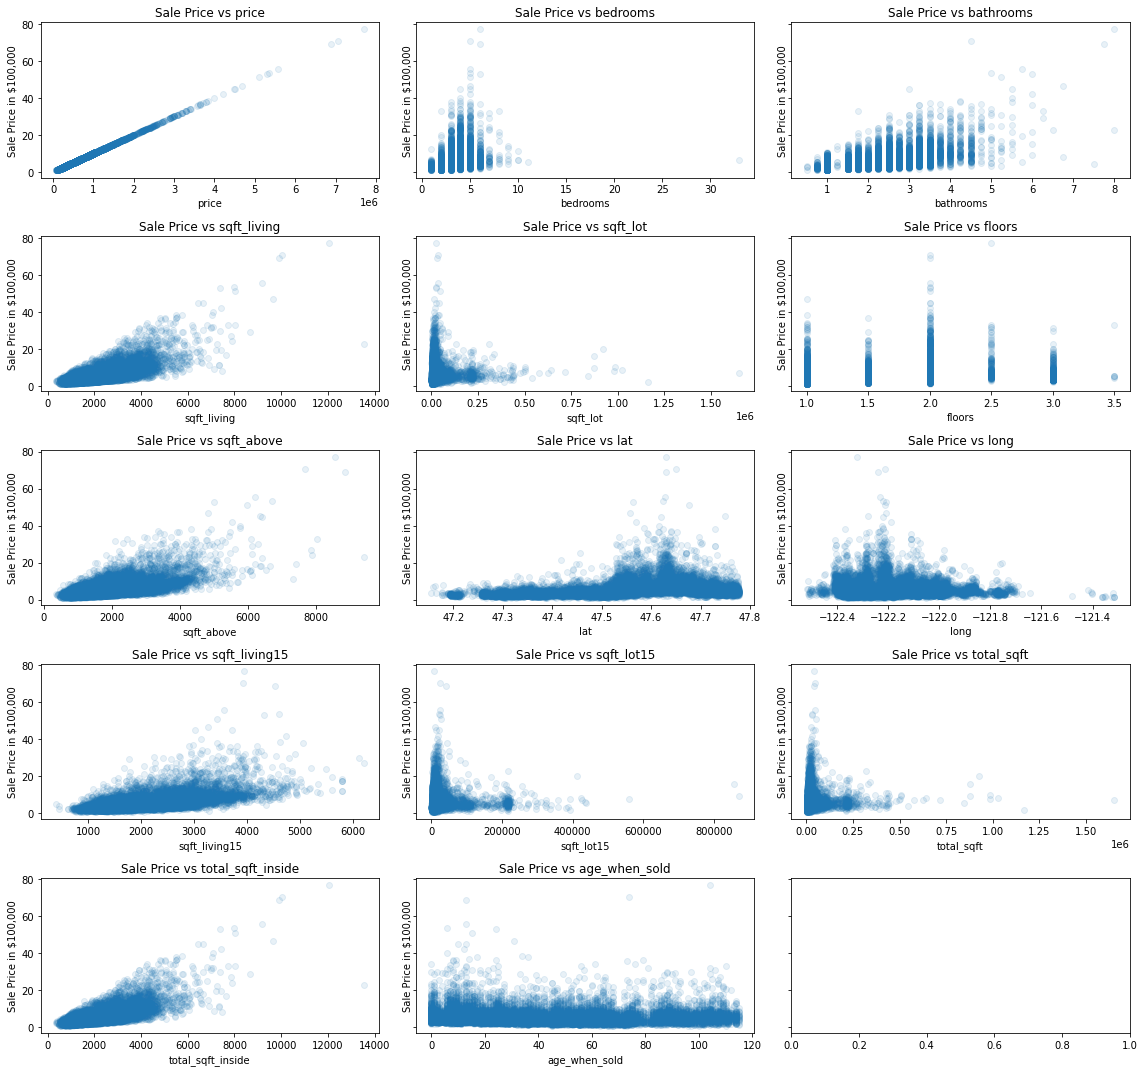

In [3759]:
# plotting linearity between feature and price
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), data.columns):
    ax.scatter(data[column], data['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()

In [3760]:
# checking correlation between each feature and price
data.corr()['price']

price                1.00000
bedrooms             0.30992
bathrooms            0.52679
sqft_living          0.70408
sqft_lot             0.08597
floors               0.25638
sqft_above           0.60825
lat                  0.30466
long                 0.01918
sqft_living15        0.58067
sqft_lot15           0.08058
total_sqft           0.10144
total_sqft_inside    0.70223
age_when_sold       -0.05081
Name: price, dtype: float64

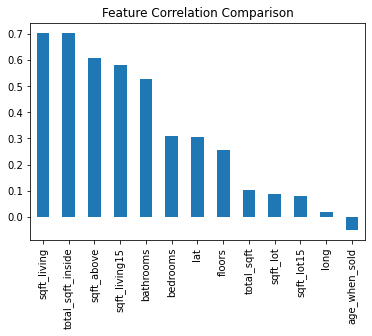

In [3761]:
# plotting correlation between each feature and price
data.corr()['price'].drop(['price']).sort_values(ascending=False).plot(kind='bar').set_title(
    'Feature Correlation Comparison');

I decided if any of the features have a correlation of under 0.10, there is clearly no relationship. The following features have no relation with the target variable price: 'sqft_lot','long','sqft_lot15','age_when_sold'. I will drop them from the model.

In [3762]:
# drop features from data
data = data.drop(['sqft_lot','long','sqft_lot15','age_when_sold'],axis=1)

In [3763]:
data.head()

,price,bedrooms,bathrooms,sqft_living,floors,sqft_above,lat,sqft_living15,total_sqft,total_sqft_inside
0,538000.00000,3,2.25000,2570,2.00000,2170,47.72100,1690,9812,2570.00000
1,571000.00000,4,2.00000,2750,1.50000,2250,47.71680,1510,10557,2750.00000
2,315000.00000,3,1.00000,960,1.00000,960,47.72640,1570,7594,960.00000
3,382500.00000,2,1.00000,1190,1.00000,1190,47.71350,1060,5630,1190.00000
4,425000.00000,3,1.75000,2500,1.00000,1300,47.72220,1580,9340,2500.00000


# 3. Normalizing/Transform Features

* having the data more normally distributed will benefit the model and model performance in general
* while normality of the predictors is not a mandatory assumption, having approximately normal features may be helpful

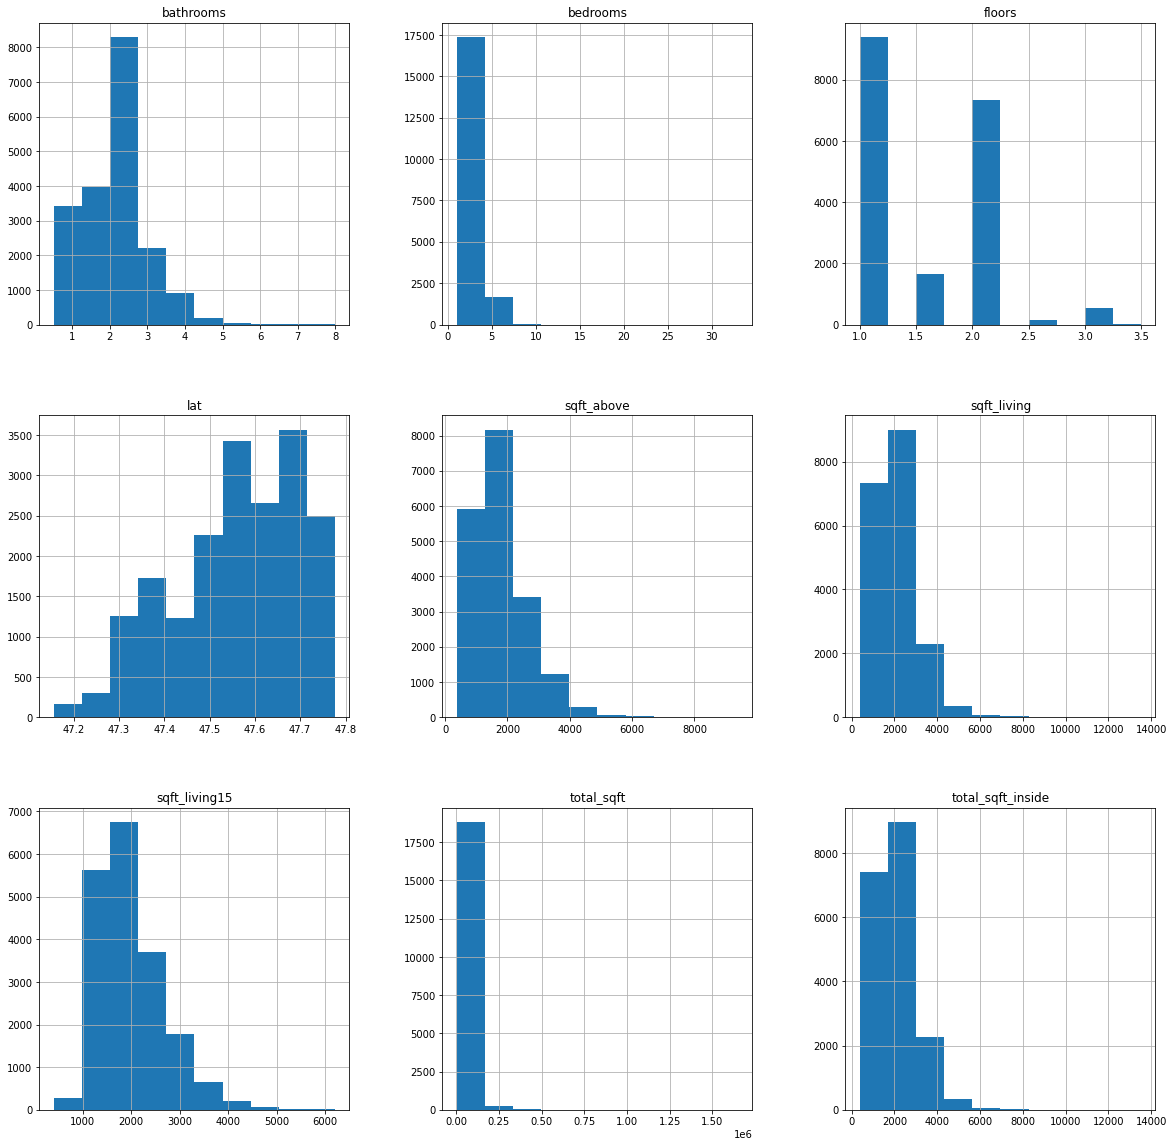

In [3764]:
# plotting each continuous feature
data.drop(['price'],axis=1).hist(figsize=(20,20));

Looks like all of the features are not normal in which it needs to be improved on. I applied the logarithmic function and normalized each non-normal feature.
* Log transforms results in having more normal data distributions
* Because features vary largely in magnitues, the coefficient sizes will fluctuate largely in magnitude as well. This can give the false impression that some variables are less important than others. Scaling the features allows them to have similar magnitudes.

In [3765]:
# log transform each feature and concatenate them into df_log
df_log = pd.DataFrame([])

for i in data.drop(['price'],axis=1):
    df_log['log_' + i] = np.log(data[i])  
        
# normalizes each feature
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

model_1_data = pd.concat([df_log.apply(normalize),data['price']],axis=1)
model_1_data.head()

,log_bedrooms,log_bathrooms,log_sqft_living,log_floors,log_sqft_above,log_lat,log_sqft_living15,log_total_sqft,log_total_sqft_inside,price
0,-0.28269,0.33553,0.70398,1.00100,0.66540,1.15905,-0.33134,-0.08276,0.71052,538000.00000
1,0.73433,0.03508,0.86332,0.18524,0.74987,1.12889,-0.67572,0.01166,0.86955,571000.00000
2,-0.28269,-1.73309,-1.61385,-0.96450,-1.23755,1.19781,-0.55656,-0.41334,-1.60287,315000.00000
3,-1.71610,-1.73309,-1.10832,-0.96450,-0.73641,1.10520,-1.75775,-0.79941,-1.09830,382500.00000
4,-0.28269,-0.30555,0.63898,-0.96450,-0.53011,1.16766,-0.53715,-0.14636,0.64565,425000.00000


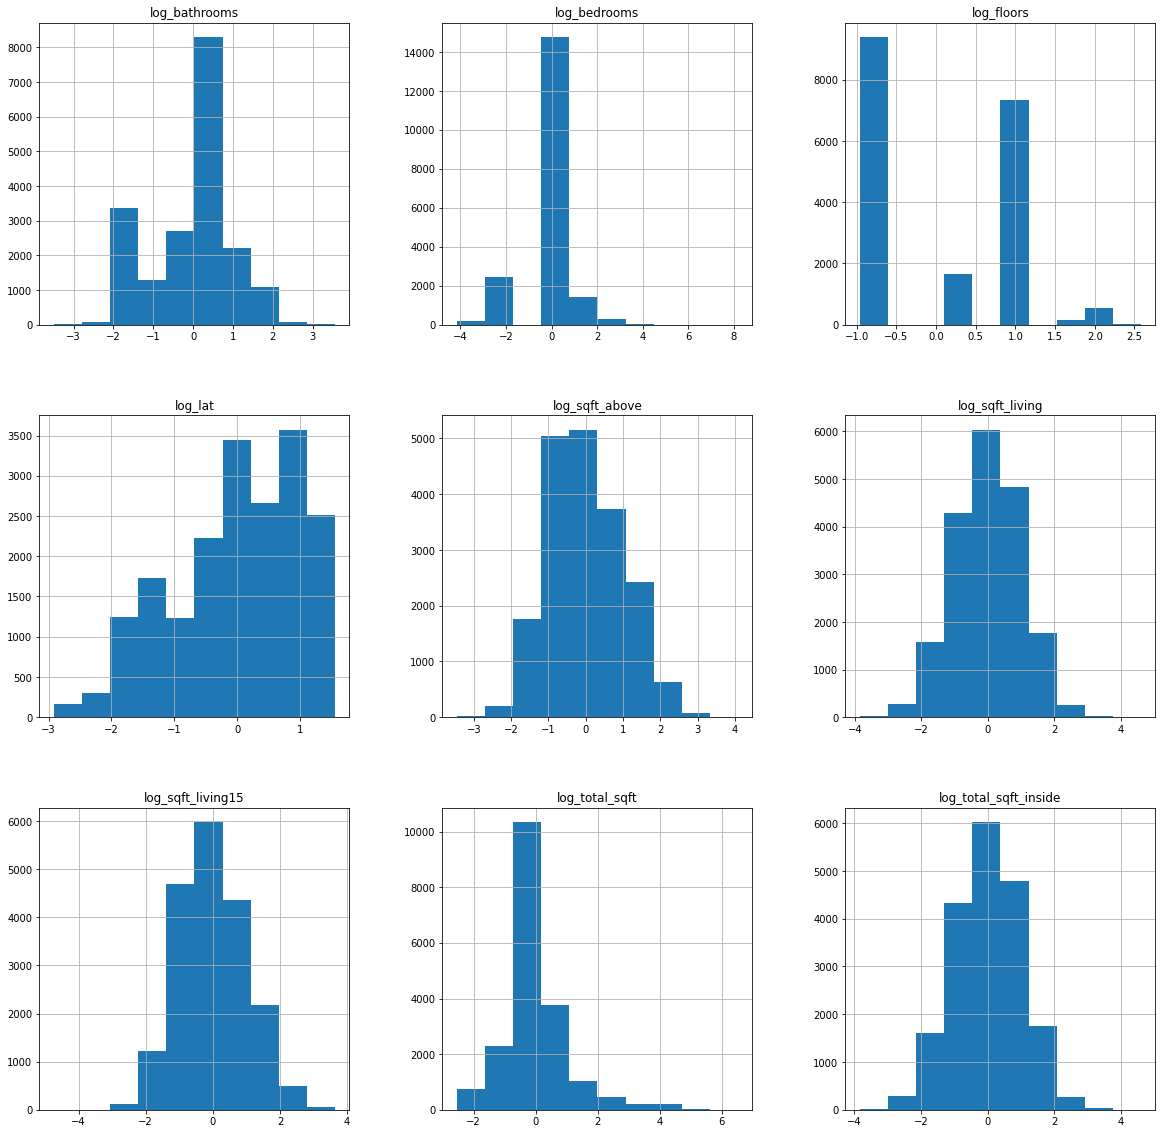

In [3766]:
# plotting each continuous feature once log transformed and normalized
model_1_data.drop(['price'],axis=1).hist(figsize=(20,20));

# 4. Removing Outliers

Outliers are extreme data values present in the data which affects the model drastically. We will remove the outliers from each continuous feature.

In [3767]:
# continuous data
log_columns = [column for column in model_1_data if 'log' in column]

In [3768]:
model_1_data.head()

,log_bedrooms,log_bathrooms,log_sqft_living,log_floors,log_sqft_above,log_lat,log_sqft_living15,log_total_sqft,log_total_sqft_inside,price
0,-0.28269,0.33553,0.70398,1.00100,0.66540,1.15905,-0.33134,-0.08276,0.71052,538000.00000
1,0.73433,0.03508,0.86332,0.18524,0.74987,1.12889,-0.67572,0.01166,0.86955,571000.00000
2,-0.28269,-1.73309,-1.61385,-0.96450,-1.23755,1.19781,-0.55656,-0.41334,-1.60287,315000.00000
3,-1.71610,-1.73309,-1.10832,-0.96450,-0.73641,1.10520,-1.75775,-0.79941,-1.09830,382500.00000
4,-0.28269,-0.30555,0.63898,-0.96450,-0.53011,1.16766,-0.53715,-0.14636,0.64565,425000.00000


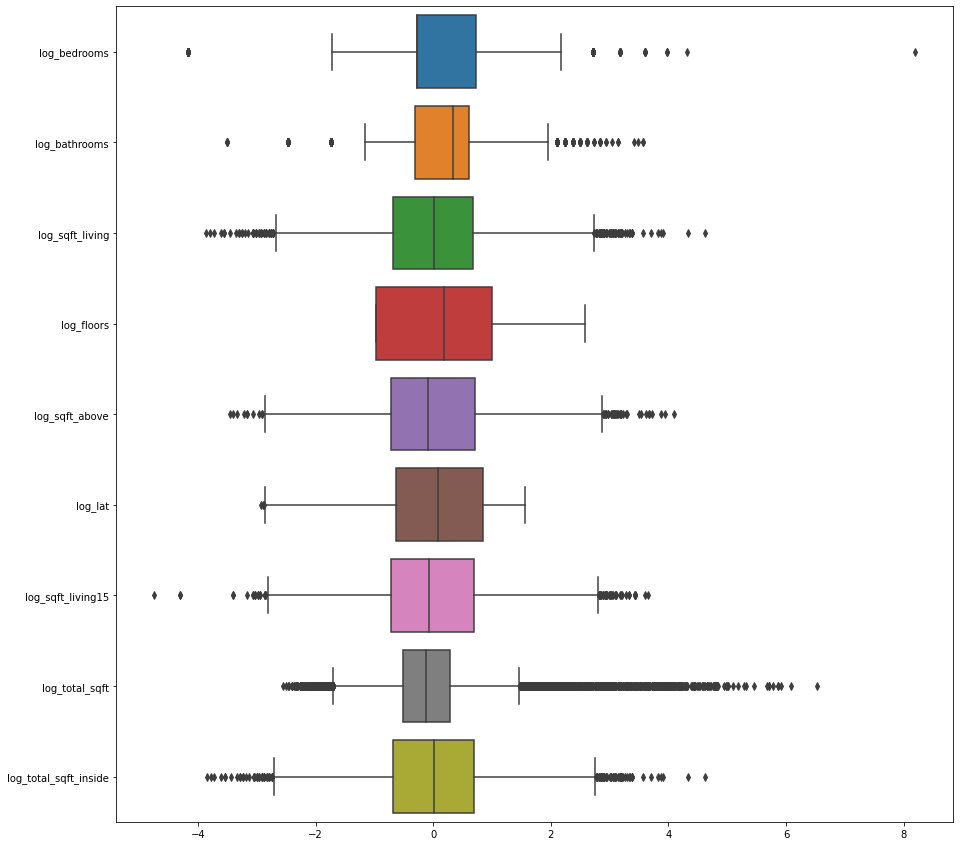

In [3769]:
# plots each continuous data as a boxplot
plt.figure(figsize=(15,15))
ax = sns.boxplot(data=model_1_data[log_columns],orient='h')

In [3770]:
# created a function to remove outliers for each continuous variable
def remove_outliers(dataframe,columns):
    for column in dataframe[columns]:
        dataframe = dataframe.sort_values(by=[column],ascending=True)
        Q1,Q3 = np.percentile(dataframe[column], [25,75])
        IQR = Q3 - Q1
        lower_range = Q1 - (1.5 * IQR)
        upper_range = Q3 + (1.5 * IQR)
        outliers = dataframe[(dataframe[column] < lower_range) | (dataframe[column] > upper_range)]
        dataframe.drop(outliers[(outliers[column] > upper_range) | (outliers[column] < lower_range) ].index, 
         inplace=True)
    return dataframe

In [3771]:
# called the function and removed outliers from the dataset
model_1_data = remove_outliers(model_1_data,log_columns)

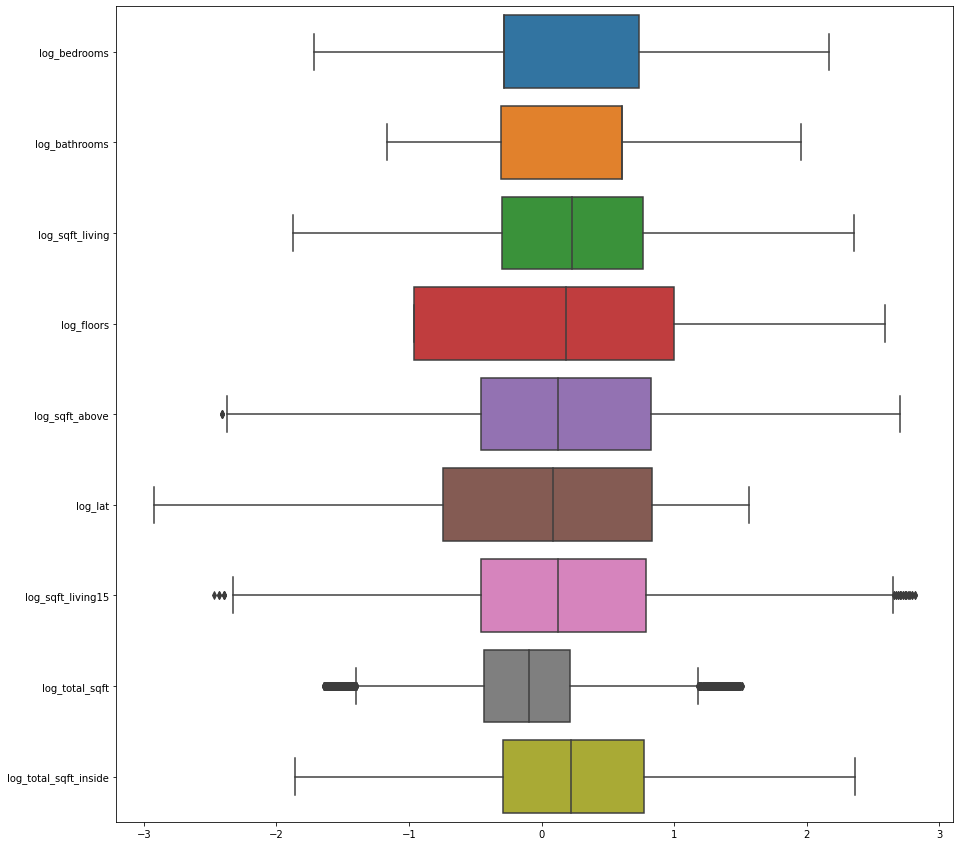

In [3772]:
# plots each continuous data as a boxplot after removing outliers
plt.figure(figsize=(15,15))
ax = sns.boxplot(data=model_1_data[log_columns],orient='h')

## 5. Removing Outliers for Target Variable

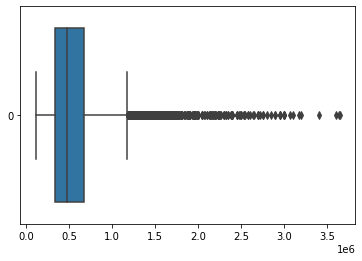

In [3773]:
# plot target variable as boxplot
sns.boxplot(data=model_1_data['price'],orient='h')

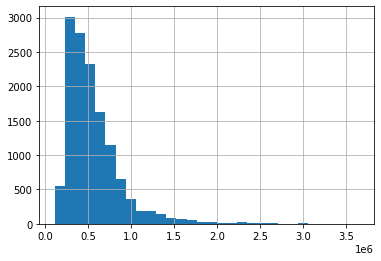

In [3774]:
# pd.options.display.float_format = '{:.5f}'.format
model_1_data['price'].hist(bins=30)

In [3775]:
# shows price variable and the price for each percentile
for i in range(0,11):
    q = i/100
    print("{} percentile: {}".format(q,model_1_data['price'].quantile(q=q)))

print('\n')

for i in range(90,101):
    q = i/100
    print("{} percentile: {}".format(q,model_1_data['price'].quantile(q=q)))

0.0 percentile: 115000.0
0.01 percentile: 192600.0
0.02 percentile: 210000.0
0.03 percentile: 220000.0
0.04 percentile: 230000.0
0.05 percentile: 240000.0
0.06 percentile: 245020.0
0.07 percentile: 250000.0
0.08 percentile: 256239.99999999997
0.09 percentile: 261000.0
0.1 percentile: 267000.0


0.9 percentile: 915000.0
0.91 percentile: 950000.0
0.92 percentile: 980000.0
0.93 percentile: 1030000.0
0.94 percentile: 1100000.0
0.95 percentile: 1200000.0
0.96 percentile: 1270000.0
0.97 percentile: 1390000.0
0.98 percentile: 1560000.0
0.99 percentile: 1870000.0
1.0 percentile: 3650000.0


In [3776]:
# removing outliers by filtering between 200,000 and 1,000,000
orig_tot = len(model_1_data)
# Subsetting to remove extreme outliers
model_1_data = model_1_data[(model_1_data['price'] < 1000000) & (model_1_data['price'] > 200000)]
print('Percent removed:', (orig_tot - len(model_1_data))/orig_tot)
# Applying a log transformation
model_1_data['price'] = model_1_data['price'].map(np.log)
# train_data, test_data = train_test_split(model_1_data)

Percent removed: 0.09090909090909091


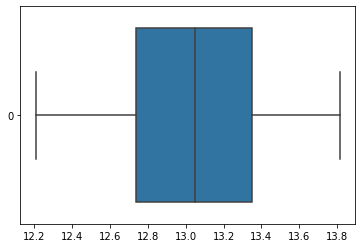

In [3777]:
# plot target variable as boxplot after filtering the price
sns.boxplot(data=model_1_data['price'],orient='h')

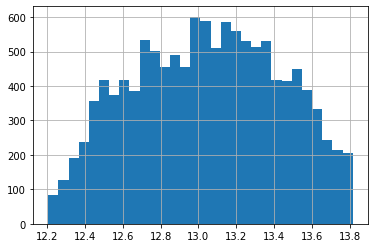

In [3778]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
model_1_data['price'].hist(bins=30);

# 6. Train Test Split

We want to predict the outcome for observations that are not necessarily in our dataset now. The reason for building the model is because we want to predict the outocome for observations that are not in our dataset now.

Train Test Split splits our data randomly to both train the model and test the model.

In [3779]:
# concat the log/normalized continuous data with the dummy data
model_1_data = pd.concat([model_1_data,dummy_data],axis=1).dropna()

In [3780]:
model_1_data.shape

(12110, 62)

In [3781]:
# splits the data into training data and testing data
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(model_1_data)

x_train_data = train_data.drop(['price'],axis=1)
y_train_data = train_data['price']

x_test_data = test_data.drop(['price'],axis=1)
y_test_data = test_data['price']

print('Training Data')
print('-------------')
print(f'x_train: {len(x_train_data)}')
print(f'y_train: {len(y_train_data)}')
print('\n')
print('Testing Data')
print('-------------')
print(f'x_test: {len(x_test_data)}')
print(f'y_test: {len(y_test_data)}')

Training Data
-------------
x_train: 9082
y_train: 9082


Testing Data
-------------
x_test: 3028
y_test: 3028


# 7. Training the Model

In [3782]:
# outcome is target
outcome = 'price'
# x_cols are the predictors
x_cols = list(x_train_data.columns)

In [3783]:
# testing regression model with current train data
pred_sum = '+'.join(x_cols)
formula = outcome + '~' + pred_sum

model_1_results = ols(formula=formula, data=train_data).fit()
model_1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     525.3
Date:                Tue, 21 Jul 2020   Prob (F-statistic):               0.00
Time:                        02:37:29   Log-Likelihood:                 2613.7
No. Observations:                9082   AIC:                            -5103.
Df Residuals:                    9020   BIC:                            -4662.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                12.5602      0.107    117.362      0.000      12.350      12.770
log_bedrooms             -0.0182      0.003     -5.960      0.000      -0.024      -0.012
log_bathrooms             0.0145      0.005      2.801      0.005       0.004       0.025
log_sqft_living           0.1850      0.019      9.506      0.000       0.147       0.223
log_floors                0.0037      0.003      1.050      0.294      -0.003       0.010
log_sqft_above            0.0939      0.008     11.082      0.000       0.077       0.110
log_lat                   0.1716      0.004     39.017      0.000       0.163       0.180
log_sqft_living15         0.0711      0.004     19.519      0.000       0.064       0.078
log_total_sqft           -0.0299      0.005     -5.645      0.000      -0.040      -0.020
log_total_sqft_inside    -0.0860      0.020     -4.212      0.000      -0.126      -0.046
waterfront_1              0.3197      0.045      7.144      0.000       0.232       0.407
view_1                    0.1230      0.016      7.649      0.000       0.091       0.155
view_2                    0.1200      0.010     11.925      0.000       0.100       0.140
view_3                    0.1376      0.015      9.115      0.000       0.108       0.167
view_4                    0.2424      0.026      9.215      0.000       0.191       0.294
condition_2               0.3789      0.110      3.444      0.001       0.163       0.595
condition_3               0.3788      0.106      3.585      0.000       0.172       0.586
condition_4               0.4262      0.106      4.034      0.000       0.219       0.633
condition_5               0.4894      0.106      4.629      0.000       0.282       0.697
quarter_sold_2            0.0403      0.007      5.907      0.000       0.027       0.054
quarter_sold_3            0.0399      0.009      4.450      0.000       0.022       0.057
quarter_sold_4            0.0329      0.009      3.578      0.000       0.015       0.051
year_sold_2015            0.0628      0.007      9.042      0.000       0.049       0.076
decade_built_1910        -0.0065      0.017     -0.385      0.700      -0.039       0.026
decade_built_1920        -0.0256      0.015     -1.652      0.099      -0.056       0.005
decade_built_1930        -0.0833      0.019     -4.319      0.000      -0.121      -0.045
decade_built_1940        -0.1192      0.015     -7.827      0.000      -0.149      -0.089
decade_built_1950        -0.2130      0.015    -14.603      0.000      -0.242      -0.184
decade_built_1960        -0.2534      0.015    -17.383      0.000      -0.282      -0.225
decade_built_1970        -0.2486      0.015    -16.862      0.000      -0.278      -0.220
decade_built_1980        -0.2090      0.015    -14.091      0.000      -0.238      -0.180
decade_built_1990      

# 8. Remove the Uninfluential Features

In [3784]:
# remove uninfluential features 
summary = model_1_results.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table),'-->' ,len(x_cols))
# print(x_cols[:5])
# p_table.head()

62 --> 57


# 9. Remove Multicollinearity

Multicollinearity exists whenever an independent variable is highly correlated with one or more of the other independent variables in a multiple regression equation. Multicollinearity is a problem because it undermines the statistical significance of an independent variable.

Below we take a look at the independent variables to see if there are high correlation between each independent variable. We use VIF (variable inflation factor) to check each independent variable - values of more than 4 or 5 are sometimes regarded as being moderate to high, with values of 10 or more being regarded as very high.

In [3785]:
# outputs the vif scores for each variable (continuous and categorical)
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = train_data[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('log_bedrooms', 1.621446765751711),
 ('log_bathrooms', 2.9309586651990873),
 ('log_sqft_living', 52.50104521384961),
 ('log_sqft_above', 12.30311048022376),
 ('log_lat', 3.611924654423829),
 ('log_sqft_living15', 2.4984829998927784),
 ('log_total_sqft', 2.271485290434032),
 ('log_total_sqft_inside', 58.50385359361233),
 ('waterfront_1', 1.4442479737715004),
 ('view_1', 1.059456370633361),
 ('view_2', 1.1131553867794406),
 ('view_3', 1.0917550537542375),
 ('view_4', 1.4185840382751558),
 ('condition_2', 1.2097394993939559),
 ('condition_3', 39.5369129015953),
 ('condition_4', 14.907688485562915),
 ('condition_5', 4.955410984763139),
 ('quarter_sold_2', 3.957172726598794),
 ('quarter_sold_3', 6.1507861185141435),
 ('quarter_sold_4', 4.963650923153014),
 ('year_sold_2015', 4.280104122524527),
 ('decade_built_1930', 1.2028861833891582),
 ('decade_built_1940', 1.6311216934744501),
 ('decade_built_1950', 2.3841918779791382),
 ('decade_built_1960', 3.140251159595386),
 ('decade_built_1970',

In [3786]:
# removes vif scores > 5
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores),'-->',len(x_cols))

57 --> 48


# 10. Remove the Uninfluential Features Again

In [3787]:
# remove uninfluential features 
summary = model_1_results.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table),'-->' ,len(x_cols))
# print(x_cols[:5])
# p_table.head()

62 --> 57


# 11. Final Model

In [3788]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model_1_results = ols(formula=formula, data=train).fit()
model_1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     569.9
Date:                Tue, 21 Jul 2020   Prob (F-statistic):               0.00
Time:                        02:37:34   Log-Likelihood:                 2643.6
No. Observations:                9082   AIC:                            -5171.
Df Residuals:                    9024   BIC:                            -4759.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                12.5561      0.129     97.261      0.000      12.303      12.809
log_bedrooms             -0.0188      0.003     -6.202      0.000      -0.025      -0.013
log_bathrooms             0.0211      0.005      4.159      0.000       0.011       0.031
log_sqft_living           0.1893      0.019      9.709      0.000       0.151       0.228
log_sqft_above            0.0956      0.008     11.958      0.000       0.080       0.111
log_lat                   0.1652      0.004     46.807      0.000       0.158       0.172
log_sqft_living15         0.0674      0.004     18.507      0.000       0.060       0.075
log_total_sqft           -0.0404      0.005     -7.879      0.000      -0.050      -0.030
log_total_sqft_inside    -0.0862      0.020     -4.210      0.000      -0.126      -0.046
waterfront_1              0.3202      0.046      7.001      0.000       0.231       0.410
view_1                    0.1140      0.016      7.260      0.000       0.083       0.145
view_2                    0.1258      0.010     12.950      0.000       0.107       0.145
view_3                    0.1396      0.016      8.880      0.000       0.109       0.170
view_4                    0.2348      0.029      8.087      0.000       0.178       0.292
condition_2               0.3325      0.132      2.518      0.012       0.074       0.591
condition_3               0.3517      0.129      2.735      0.006       0.100       0.604
condition_4               0.4079      0.129      3.172      0.002       0.156       0.660
condition_5               0.4643      0.129      3.609      0.000       0.212       0.717
quarter_sold_2            0.0362      0.007      5.318      0.000       0.023       0.050
quarter_sold_3            0.0292      0.009      3.267      0.001       0.012       0.047
quarter_sold_4            0.0255      0.009      2.792      0.005       0.008       0.043
year_sold_2015            0.0578      0.007      8.391      0.000       0.044       0.071
decade_built_1930        -0.0562      0.015     -3.655      0.000      -0.086      -0.026
decade_built_1940        -0.1193      0.011    -11.134      0.000      -0.140      -0.098
decade_built_1950        -0.1957      0.010    -20.517      0.000      -0.214      -0.177
decade_built_1960        -0.2382      0.009    -25.309      0.000      -0.257      -0.220
decade_built_1970        -0.2381      0.010    -24.215      0.000      -0.257      -0.219
decade_built_1980        -0.1908      0.010    -18.696      0.000      -0.211      -0.171
decade_built_1990        -0.1713      0.011    -15.851      0.000      -0.193      -0.150
decade_built_2000        -0.1933      0.011    -18.071      0.000      -0.214      -0.172
decade_built_2010        -0.1256      0.012    -10.332      0.000      -0.149      -0.102
grade_binned_Good      

### Interpretation

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

* R-squared of 0.783 (78.3% indicates that the model explains all the variability of the response data around its mean)
* Adjusted R-squared of 0.781 (version of the R-Squared that penalizes additional independent variables)
* 57 parameters in the model (not including the constant/intercept term if present)
* skewness is -0.139 which means the distribution is approximately symmetric.
* kurtosis is 4.295 which means the data has heavier tails than a normal distribution.
* one independent variables with high p-values: 'city_Carnation', but otherwise all other variables are less than 0.05 (all statistically significant)

# 12. Check the Normality Assumption

The normality assumption states that the model residuals should follow a normal distribution. For regression, when checking if the data in this sample is normally distributed, we can use a Normal Q-Q plot to test that assumption.

In the context of normality of residuals, Q-Q plots can help you validate the assumption of normally distributed residuals. It uses standardized values of residuals to determine the normal distribution of errors. Ideally, this plot should show a straight line. A curved, distorted line suggests residuals have a non-normal distribution.

Below the Q-Q plot looks quite normal.

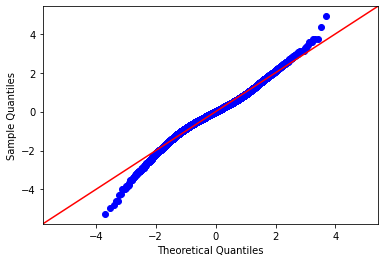

In [3789]:
# validate the asssumption of normally distributed residuals
    # should show a straight line
    # a curve,distorted line suggests residuals have a non-normal distribution
import scipy.stats as stats
residuals = model_1_results.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

# 13. Check Homoscedasticity

Heteroscedasticity (also spelled heteroskedasticity) refers to the circumstance in which the dependent variable is unequal across the range of values of the predictor(s).

When there is heteroscedasticity in the data, a scatterplot of these variables will often create a cone-like shape. The scatter of the dependent variable widens or narrows as the value of the independent variable increases.

Looks like there is homoscedasticity in our data!

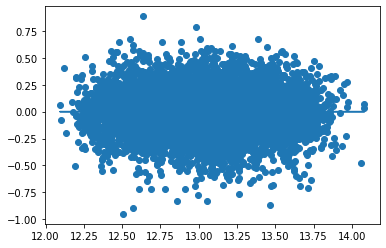

In [3790]:
plt.scatter(model_1_results.predict(train_data[x_cols]), model_1_results.resid)
plt.plot(model_1_results.predict(train_data[x_cols]), [0 for i in range(len(train_data))])

# 14. Validate the Model

In [3791]:
# outputs the training and testing data rows
print('Training Data')
print('-------------')
print(f'x_train: {len(x_train_data)}')
print(f'y_train: {len(y_train_data)}')
print('\n')
print('Testing Data')
print('-------------')
print(f'x_test: {len(x_test_data)}')
print(f'y_test: {len(y_test_data)}')

Training Data
-------------
x_train: 9082
y_train: 9082


Testing Data
-------------
x_test: 3028
y_test: 3028


**MAE** is the sum of absolute differences between our target and predicted variables. So it measures the average magnitude of errors in a set of predictions, without considering their directions.

**MSE** the average squared difference between the estimated values and the actual value.

**RMSE** Root Mean Square Error, is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are

In [3792]:
from sklearn.metrics import mean_squared_error

y_pred_train = lm.predict(x_train_data)
y_pred_test = lm.predict(x_test_data)

# calculate Mean absolute Error (MAE)
mae_train = mean_absolute_error(y_train_data, y_pred_train)
mae_test = mean_absolute_error(y_test_data, y_pred_test)
print("MAE Train Set:", mae_train) 
print("MAE Test Set :", mae_test,'\n')

# calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train_data, y_pred_train)
mse_test = mean_squared_error(y_test_data, y_pred_test)
print("MSE Train Set:", mse_train) 
print("MSE Test Set :", mse_test,'\n')

# calculate Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print("RMSE Train Set:", rmse_train)
print("RMSE Test Set:", rmse_test,'\n')

MAE Train Set: 0.1376636754367202
MAE Test Set : 0.13467122443792667 

MSE Train Set: 0.03408986126040015
MSE Test Set : 0.03325147448206977 

RMSE Train Set: 0.1846343989087628
RMSE Test Set: 0.18234986833576208 



In [3793]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(linreg, x_train_data, y_train_data, cv=5,  scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(linreg, x_train_data, y_train_data, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg, x_train_data, y_train_data, cv=20, scoring='neg_mean_squared_error'))

print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

-0.03358623154509076
-0.03351917026971503
-0.03347509017440285
